# Pendelrörelse
I den här labben ska ni mäta rörelsen för en riktig pendel och jämföra den med rörelsen för en matematisk pendel. Den matematiska pendeln simuleras med hjälp av python-notebooken nedan.

## Läs in nödvändiga pythonbibliotek
Först behövs de funktioner som ska användas i programmet importeras.

In [40]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Oct 25 22:29:47 2021

@author: andreas
"""
## Import requiried libraries
import numpy as np  #Library for numerical expressions
import matplotlib.pyplot as plt #Library for plotting
%matplotlib inline
from scipy.integrate import odeint #Used tp calculate the numerical solution

## **Definiera konstanter och mått**
Konstanter och fasta längder som gäller för experimenten behöver definieras.

In [29]:
########################## Inputs #############################################
# It is quite important that the length of the pendulum is measured accurately 
# for good results
L = 0.44 #m
g = 9.81 #m/s**2

## Funktioner för simulering av pendelrörelsen
Nedan finns fördefinierade funktioner som används för att beskriva pendelrörelsen numeriskt.

### Förenklad rörelse med analytisk lösning
Om $sin(\phi)$ för små vinklar approximeras med $\phi$ kan utrycket för pendelns rörelse förenklas så att det går att lösa analytiskt. Den lösningen används i funktionen `mathematical_pendulum()`.

In [30]:
# This function calculates the angle and angular speed of a mathematical 
# pendulum. Input parameters are:
# t - time in seconds (array)
# amplitude - in radians
# phi0 - initial angle in radians
# returns: Array containing the angle and angular velocity as a fct of time
def mathematical_pendulum(t, amplitude, phi0=0):
    omega = np.sqrt(g/L)
    return [amplitude*np.sin(omega*t+phi0/amplitude*np.pi/2), \
            amplitude*omega*np.cos(omega*t+phi0/amplitude*np.pi/2)]


### Realistisk rörelse med numerisk lösning
Om approximationen $sin(\phi)=\phi$ används blir den analytiska lösningen väldigt komplicerad. Då är det bättre att lösa den numeriskt vilket görs med funktionen `numerical_pendulum()`. För att lösa den differentialekvation som beskriver rörelsen numeriskt behövs även en hjälpfunktion som returnerar dervatorna av vinkeln och vinkelhastigheten. Det görs i funktionen `pend()` som sedan anropas av `numerical_pendulum()`.

In [31]:
# pend calculates the derivatives of the angle and the angular velocity
# for every time step in t. This is needed for the numerical 
# calculation of the pendulums motion.
# Inputs:
# y - Array that contains the angle and the angular velocity at the timestep t 
# t - time in seconds
# c - characteristic constant g/L
# returns the derivatives of y
def pend(y, t, c=g/L):
    phi, omega = y
    dydt = [omega, - c*np.sin(phi)]
    return dydt

In [32]:
# This function calculates the angle and angular speed of a pendulum. 
# For this it solves the differential equation numerically, instead of 
# using an approximation for the sine function.
# Note that it does not consider friction.
# Input parameters are:
# t - time in seconds (array)
# amplitude - in radians
# phi0 - initial angle in radians
# returns: Array containing the angle and angular velocity as a fct of time
def numerical_pendulum(t, phi0, omega0):
    solution = odeint(pend, [phi0, omega0], t)
    return solution[:,0], solution[:,1]

## **Uppmätta värden**
För att plotta mätvärden läses de in i form av en *csv*-fil, d.v.s. en kolumnbaserad textfil. Beroende på om det är vinkeln eller x-koordinaten som har mäts behöver variabeln `input_is_x_coordinates` sättas till `True` eller `False`.

In [33]:
# Reads in the data as it comes from Tracker. The angle is supposed to be in 
# degree
# Further, it seems that the code gives the best results if the dataset starts 
# with the pendulum at one of the turning points, i.e. zero angular velocity
dataset = np.loadtxt("my_data.csv", skiprows=2, delimiter='\t')
# There is also an option to read in the x coordinate only
# However, reading in the angle is preferable
input_is_x_coordinates = False

De inlästa värdena omvandlas sedan till vinkelvärden i radianer.

In [34]:
# This converts the input into the angle of the pendulum in radians
if(input_is_x_coordinates):
    phi_exp = np.arcsin(dataset[:,1]/L)
else:
    phi_exp = dataset[:,1]*np.pi/180

Från den uppmätta vinkeln $\phi$ görs en numerisk derivata $\omega=\frac{d\phi}{dt}$. Dessutom identifieras begynnelsevärdena från mätningarna vilket behövs för de kommande simuleringarna.

In [35]:
# Extracting the time of the experimental data
t_exp = dataset[:,0]
# Phi0 is the initial angle of the pendulum
phi0 = phi_exp[0]
# Calculating the derivative of phi as it is needed for the numerical 
# calculation and plots
omega_exp = np.gradient(phi_exp, t_exp, edge_order=2)
# Initial angular velocity
omega0 = omega_exp[0]
# Maximum amplitude of the pendulums motion
amplitude = np.max(abs(phi_exp))

För att kunna utföra simuleringarna behövs även en vektor med olika tidpunkter vilka skapas från era uppmätta start- och stopptider.

In [36]:
# Extraction of the timeframe the measurement data was taken from. 
# This is needed for the plots
xlims = [np.min(t_exp),np.max(t_exp)]
# Creation of an array that represents smaller timesteps than the experimental 
# data.This is done to get a smoother graph for the theoretical calculations
t = np.linspace(xlims[0], xlims[1], 1000)

## Analytiska och numeriska lösningar
Nu kan rörelsen simuleras med de två olika lösningsmetoderna vi introducerade tidigare.

In [37]:
# Thereoretical calculations for the mathematical pendulum and the numerical 
# solution.
phi_mathematical, omega_mathematical = mathematical_pendulum(t, amplitude, phi0)
phi_numerical, omega_numerical = numerical_pendulum(t, phi0, omega0)

## **Uppmätt och simulerad vinkelrörelse**
Med alla simuleringar gjorda kan mätdatan jämföras med de numeriska lösningarna för vinkelrörelsen.

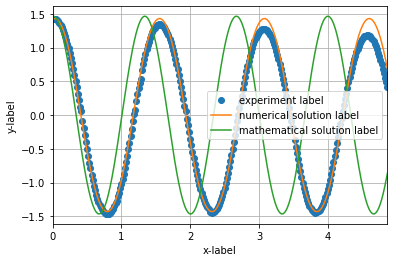

In [38]:
# Creating plots for the angle as function of time
# Here I thought that the students should put their own labels for the axis
# into the code
fig, ax = plt.subplots()
ax.plot(t_exp, phi_exp, "o",  label='experiment label')
ax.plot(t, phi_numerical, label='numerical solution label')
ax.plot(t, phi_mathematical, label='mathematical solution label')
# The location of the legend can also be manually be chosen according to this 
# chart: https://www.geeksforgeeks.org/change-the-legend-position-in-matplotlib/
ax.legend(loc='best')
ax.set_ylabel('y-label')
ax.set_xlabel('x-label')
ax.set_xlim(xlims)
ax.grid()

## **Uppmätt och simulerad vinkelhastighet**
Samma sak kan även göras för vinkelhastigheten.

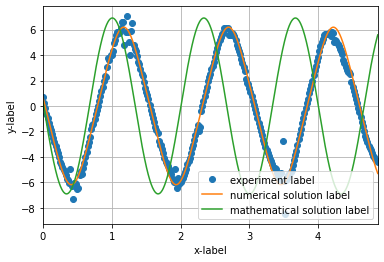

In [39]:
# Creating plots for the anglular velocity as function of time
# Here I thought that the students should put their own labels for the axis
# into the code
fig, ax = plt.subplots()
ax.plot(t_exp, omega_exp, "o",  label='experiment label')
ax.plot(t, omega_numerical, label='numerical solution label')
ax.plot(t, omega_mathematical, label='mathematical solution label')
ax.legend(loc='best')
ax.set_ylabel('y-label')
ax.set_xlabel('x-label')
ax.set_xlim(xlims)
ax.grid()